In [16]:
import numpy as np
import pandas as pd 
import tensorflow as tf
import re
import os
import matplotlib.pyplot as plt


In [4]:
path = "./spongebob_data" # make sure this pathname matches or this wont work
dir_list = os.listdir(path)
 
print("Files and directories in '", path, "' :")
print(dir_list)

Files and directories in ' ./spongebob_data ' :
['LighthouseLouie.txt', 'PennyFoolish.txt', 'BarnacleFace.txt', 'OralReport.txt', 'TheKrustySlammer.txt', 'SentimentalSponge.txt', 'FunSizedFriends.txt', 'ManRayReturns.txt', 'MyLeg.txt', 'BummerVacation.txt', 'PatricksCoupon.txt', 'GulliblePants.txt', 'TheGreatPattyCaper.txt', 'StuckontheRoof.txt', 'Karen.txt', 'BigSisterSam.txt', 'MermaidManandBarnacleBoy.txt', 'ACabinintheKelp.txt', 'MermaidManandBarnacleBoyV.txt', 'TheGetaway.txt', 'SpongeBobMeetstheStrangler.txt', 'BumpertoBumper.txt', 'GooGooGas.txt', 'BigPinkLoser.txt', 'GrandmumstheWord.txt', 'ToyStoreofDoom.txt', 'NewLeaf.txt', 'SandCastlesintheSand.txt', 'BornAgainKrabs.txt', 'BuriedinTime.txt', 'AreYouHappyNow.txt', 'SingaSongofPatrick.txt', 'ShellbackShenanigans.txt', 'OldManPatrick.txt', 'PatricksStaycation.txt', 'SB.txt', 'ChimpsAhoy.txt', 'NaturePants.txt', 'SpongeBobvsthePattyGadget.txt', 'LarrytheFloorManager.txt', 'NightLight.txt', 'SalsaImbecilicus.txt', 'ChefBob.txt', 

In [8]:
transcripts = {}


for dirname, _, filenames in os.walk(path):
    for filename in filenames:
        file = os.path.join(dirname,filename)
        f = open(file)
        transcripts[os.path.basename(file[:-4])] = f.read()
print(len(transcripts))

393


In [10]:
lines = {episode: transcripts[episode].splitlines() for episode in transcripts.keys()}
print(lines['KrabBorg']) # check that it works

['', "TV narrator: [SpongeBob is watching the movie while eating popcorn] We now return to tonight's Creepy Time Theater presentation of Night of the Robot.", 'Man being chased: [screaming while being chased by a giant robot]', "SpongeBob: Hurry, Gary, the scary robot movie's on. ", 'Gary: Meow. ', "SpongeBob: What do you mean I shouldn't watch this? Scary movies don't always freak me out! [scene cuts to SpongeBob lying in his bed, whimpering and shivering] What if Mom is a robot? What if Uncle Sherm is a robot? What if Gary is a robot? Gary? [Gary is sleeping] Psst, Gary? Gare-Bear? [pokes Gary's eye, causing him to wake up] ", 'Gary: Meow! ', "SpongeBob: Gary, if you were a robot, you'd tell me, right? ", 'Gary: Meow. ', "SpongeBob: Oh, I've got nothing to worry about. And now to get a good night's sleep. [goes to sleep. Dreams about running from the giant robot from the movie earlier. Scene cuts to the next day at the Krusty Krab, with SpongeBob in the kitchen, panting] Robot! OH MY

In [14]:
spongebob_lines = {}
for episode in lines:
    episode_lines = lines[episode]
    spongebob_episode_lines = []
    for line in episode_lines:
        if('SpongeBob:' in line):
            spongebob_episode_lines.append(line)
    spongebob_lines[episode] = spongebob_episode_lines

Text(0.5, 1.0, 'Number of spongebob lines per episode')

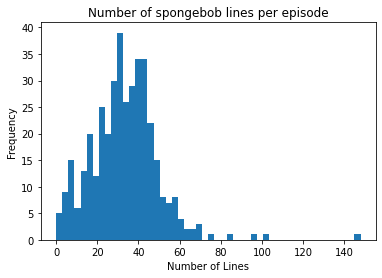

In [18]:
spongebob_num_lines = {episode: len(spongebob_lines[episode]) for episode in spongebob_lines.keys()}
plt.xlabel('Number of Lines')
plt.ylabel('Frequency')
plt.hist(spongebob_num_lines.values(), bins=50)
plt.title('Number of spongebob lines per episode')